In [283]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime


warnings.filterwarnings('ignore')
plt.style.use('seaborn-dark')
%matplotlib inline

In [284]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [285]:
train.head()

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.0
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.0
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.0


In [286]:
def print_unique_values():
    for col in train.columns:
        print(f"{col} ---> {train[col].nunique()} unique values")

In [287]:
print_unique_values()

ID ---> 107833 unique values
DATOP ---> 1011 unique values
FLTID ---> 1861 unique values
DEPSTN ---> 132 unique values
ARRSTN ---> 128 unique values
STD ---> 81697 unique values
STA ---> 85136 unique values
STATUS ---> 5 unique values
AC ---> 68 unique values
target ---> 968 unique values


In [288]:
columns_remap = {
    'DATOP': 'date_of_flight',
    'FLTID': 'flight_number',
    'DEPSTN': 'departure_point',
    'ARRSTN': 'arrival_point',
    'STD': 'scheduled_time_departure',
    'STA': 'scheduled_time_arrival',
    'STATUS': 'flight_status',
    'AC': 'aircraft_code',
    'target': 'flight_delay'
}

In [289]:
train.rename(columns=columns_remap, inplace=True)

In [290]:
test.rename(columns=columns_remap, inplace=True)

In [291]:
train['scheduled_time_arrival'] = train['scheduled_time_arrival'].str.replace('.',':')

In [292]:
test['scheduled_time_arrival'] = test['scheduled_time_arrival'].str.replace('.',':')

In [293]:
def extract_time_info(col, df):
    df[f"{col}_year"] = df[col].dt.year
    df[f"{col}_month"] = df[col].dt.month_name().astype(month_type)
    df[f"{col}_weekday"] = df[col].dt.day_name().astype(week_type)
    df[f"{col}_quarter"] = df[col].dt.quarter
    df[f"{col}_day"] = df[col].dt.day
    if col != 'date_of_flight':
        df[f"{col}_hour"] = df[col].dt.hour

In [294]:
date_columns = ['date_of_flight', 'scheduled_time_departure', 'scheduled_time_arrival']

month_type = pd.api.types.CategoricalDtype(categories=[
    'January',
    'February',
    'March',
    'April',
    'May',
    'June',
    'July',
    'August',
    'September',
    'October',
    'November',
    'December'
], ordered=True)

week_type = pd.api.types.CategoricalDtype(categories=[
    'Monday',
    'Tuesday',
    'Wednesday',
    'Thursday',
    'Friday',
    'Saturday',
    'Sunday'
], ordered=True)

new_date_columns = []
for col in date_columns:
    train[col] = pd.to_datetime(train[col])
    test[col] = pd.to_datetime(test[col])
    extract_time_info(col, train)
    extract_time_info(col, test)
    new_date_columns.append([f"{col}_month", f"{col}_weekday", f"{col}_quarter", f"{col}_hour"])

In [295]:
new_date_columns[0].pop()

'date_of_flight_hour'

In [296]:
map_time_type = {
    'month': [
        'January',
        'February',
        'March',
        'April',
        'May',
        'June',
        'July',
        'August',
        'September',
        'October',
        'November',
        'December'
    ],
    'weekday': [
        'Monday',
        'Tuesday',
        'Wednesday',
        'Thursday',
        'Friday',
        'Saturday',
        'Sunday'
    ],
    'quarter': [
        1,2,3,4
    ],
    'hour': np.arange(0,24)
}

In [297]:
len(list(filter(lambda x: type(x) == str, map_time_type['hour'.split('_')[-1]])))

0

In [298]:
np.arange(0, 30001, 5000)

array([    0,  5000, 10000, 15000, 20000, 25000, 30000])

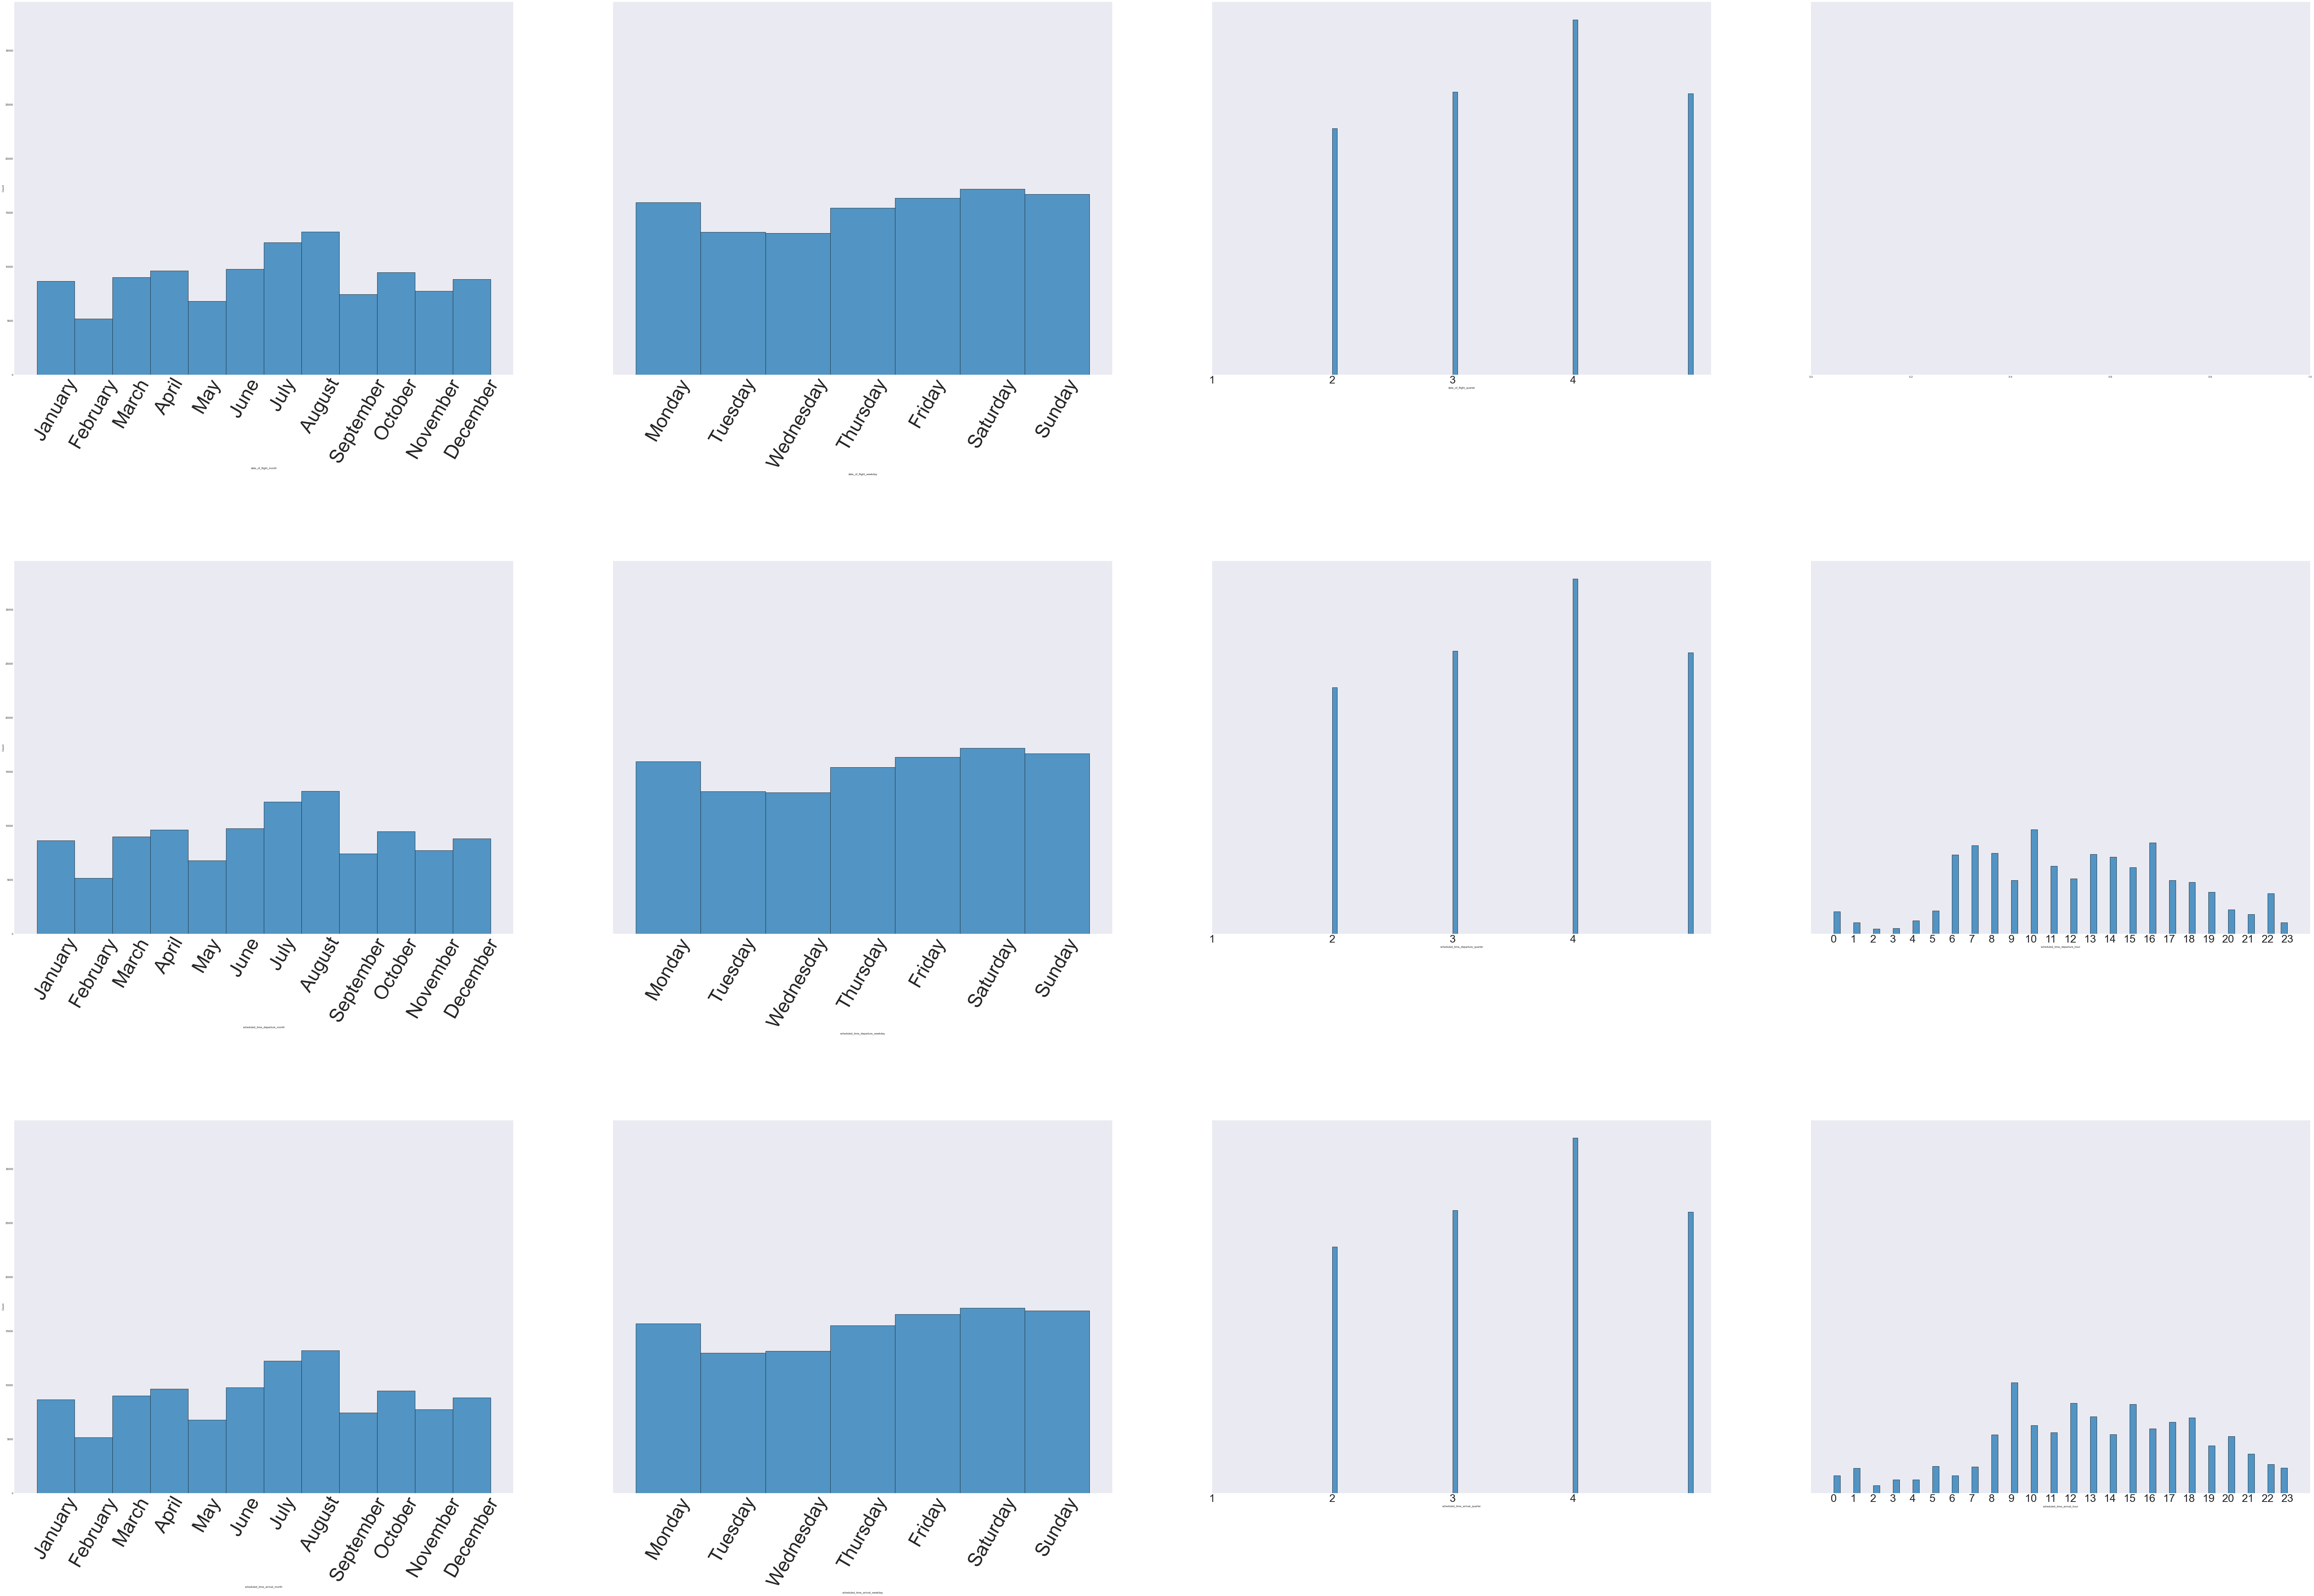

In [299]:
fig, ax = plt.subplots(nrows=3,ncols=4, sharey=True, figsize=(150,100))
plt.subplots_adjust(hspace=0.5, wspace=.2)

for ind_i, col_list in enumerate(new_date_columns):
    for ind_j, col in enumerate(col_list):
        try:
            sns.histplot(data=train, x=col, ax=ax[ind_i][ind_j])
            rotation = 0
            fontsize = 40
            if len(list(filter(lambda x: type(x) == str, map_time_type[col.split('_')[-1]]))):
                rotation = 60
                fontsize= 70
            ax[ind_i, ind_j].set_xticks(ticks=np.arange(0, len(map_time_type[col.split('_')[-1]])), labels=map_time_type[col.split('_')[-1]], fontsize=fontsize, rotation=rotation)
            ax[ind_1, ind_j].set_yticks(ticks=list(range(0, 7)), labels=['0',  '5000', '10000', '15000', '20000', '25000', '30000'], fontsize=70)
        except:
            continue

In [300]:
ax[0][1].tick_params(labelsize=20, reset=True)

<AxesSubplot:xlabel='date_of_flight'>

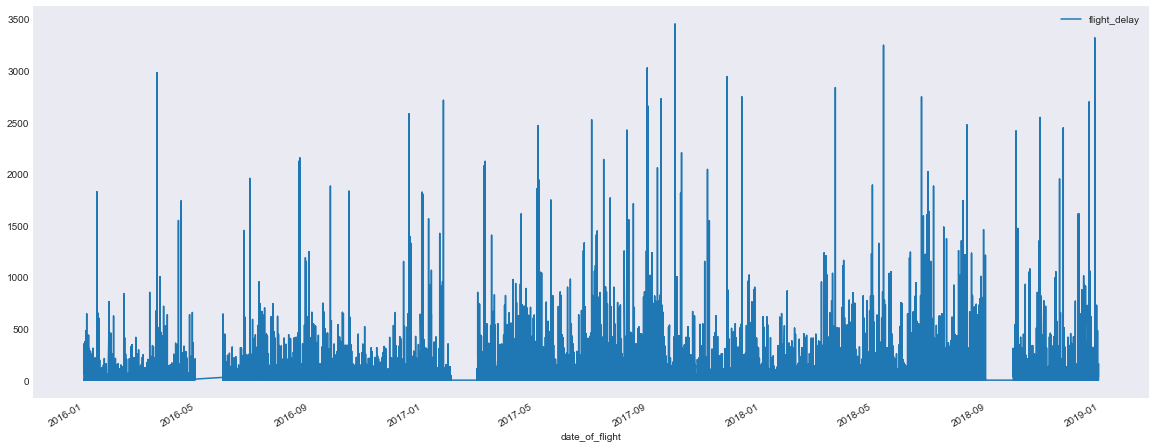

In [301]:
train[['date_of_flight', 'flight_delay']].set_index('date_of_flight').plot(kind='line', figsize=(20,8))

### Feature Engineering

In [307]:
train['estimated_flight_duration'] = train['scheduled_time_arrival'] - train['scheduled_time_departure']

In [308]:
test['estimated_flight_duration'] = test['scheduled_time_arrival'] - test['scheduled_time_departure']

In [309]:
duration_df = train['estimated_flight_duration'].dt.components

In [310]:
duration_df_test = test['estimated_flight_duration'].dt.components

In [311]:
def convert_timedelta(duration):
    days, hours, minutes, seconds = duration['days'], duration['hours'], duration['minutes'], duration['seconds']
    minutes = days * 24 * 60 + hours * 60 + minutes + seconds // 60
    return minutes
minutes = convert_timedelta(duration_df.iloc[1])
print('{} minutes'.format(minutes))

110 minutes


In [312]:
train['estimated_flight_duration_minutes'] = duration_df.apply(convert_timedelta, axis=1)
test['estimated_flight_duration_minutes'] = duration_df_test.apply(convert_timedelta, axis=1)

In [313]:
train.drop(['estimated_flight_duration'], axis=1, inplace=True)
test.drop(['estimated_flight_duration'], axis=1, inplace=True)

<AxesSubplot:xlabel='estimated_flight_duration_minutes'>

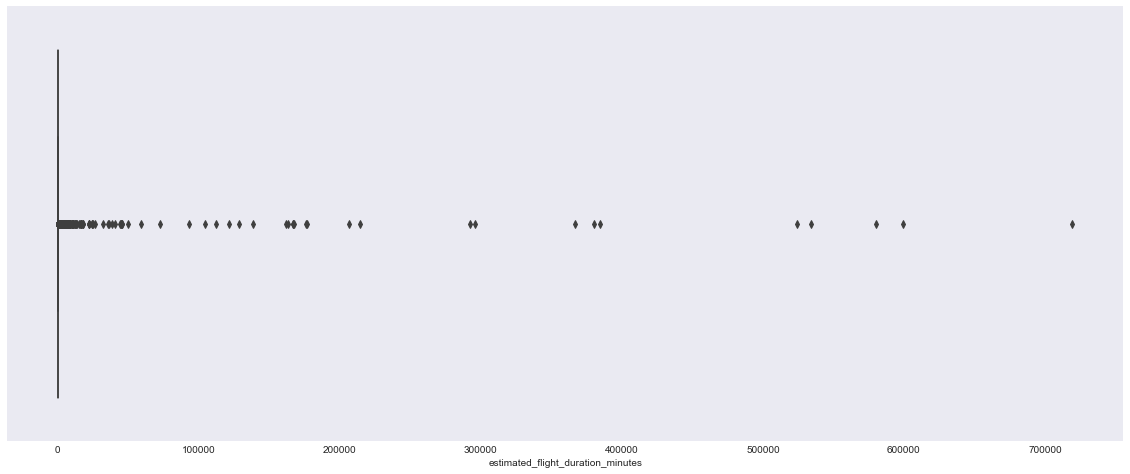

In [314]:
fig, ax = plt.subplots(figsize=(20,8))
sns.boxplot(train['estimated_flight_duration_minutes'], ax=ax)

In [325]:
train['flight_id'] = train['flight_number'].apply(lambda x: x.split(' ')[0])
test['flight_id'] = test['flight_number'].apply(lambda x: x.split(' ')[0])

In [326]:
train['aircraft_id'] = train['aircraft_code'].apply(lambda x: x.split(' ')[0])
test['aircraft_id'] = test['aircraft_code'].apply(lambda x: x.split(' ')[0])

In [316]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='scheduled_time_arrival_year', ylabel='flight_delay'>

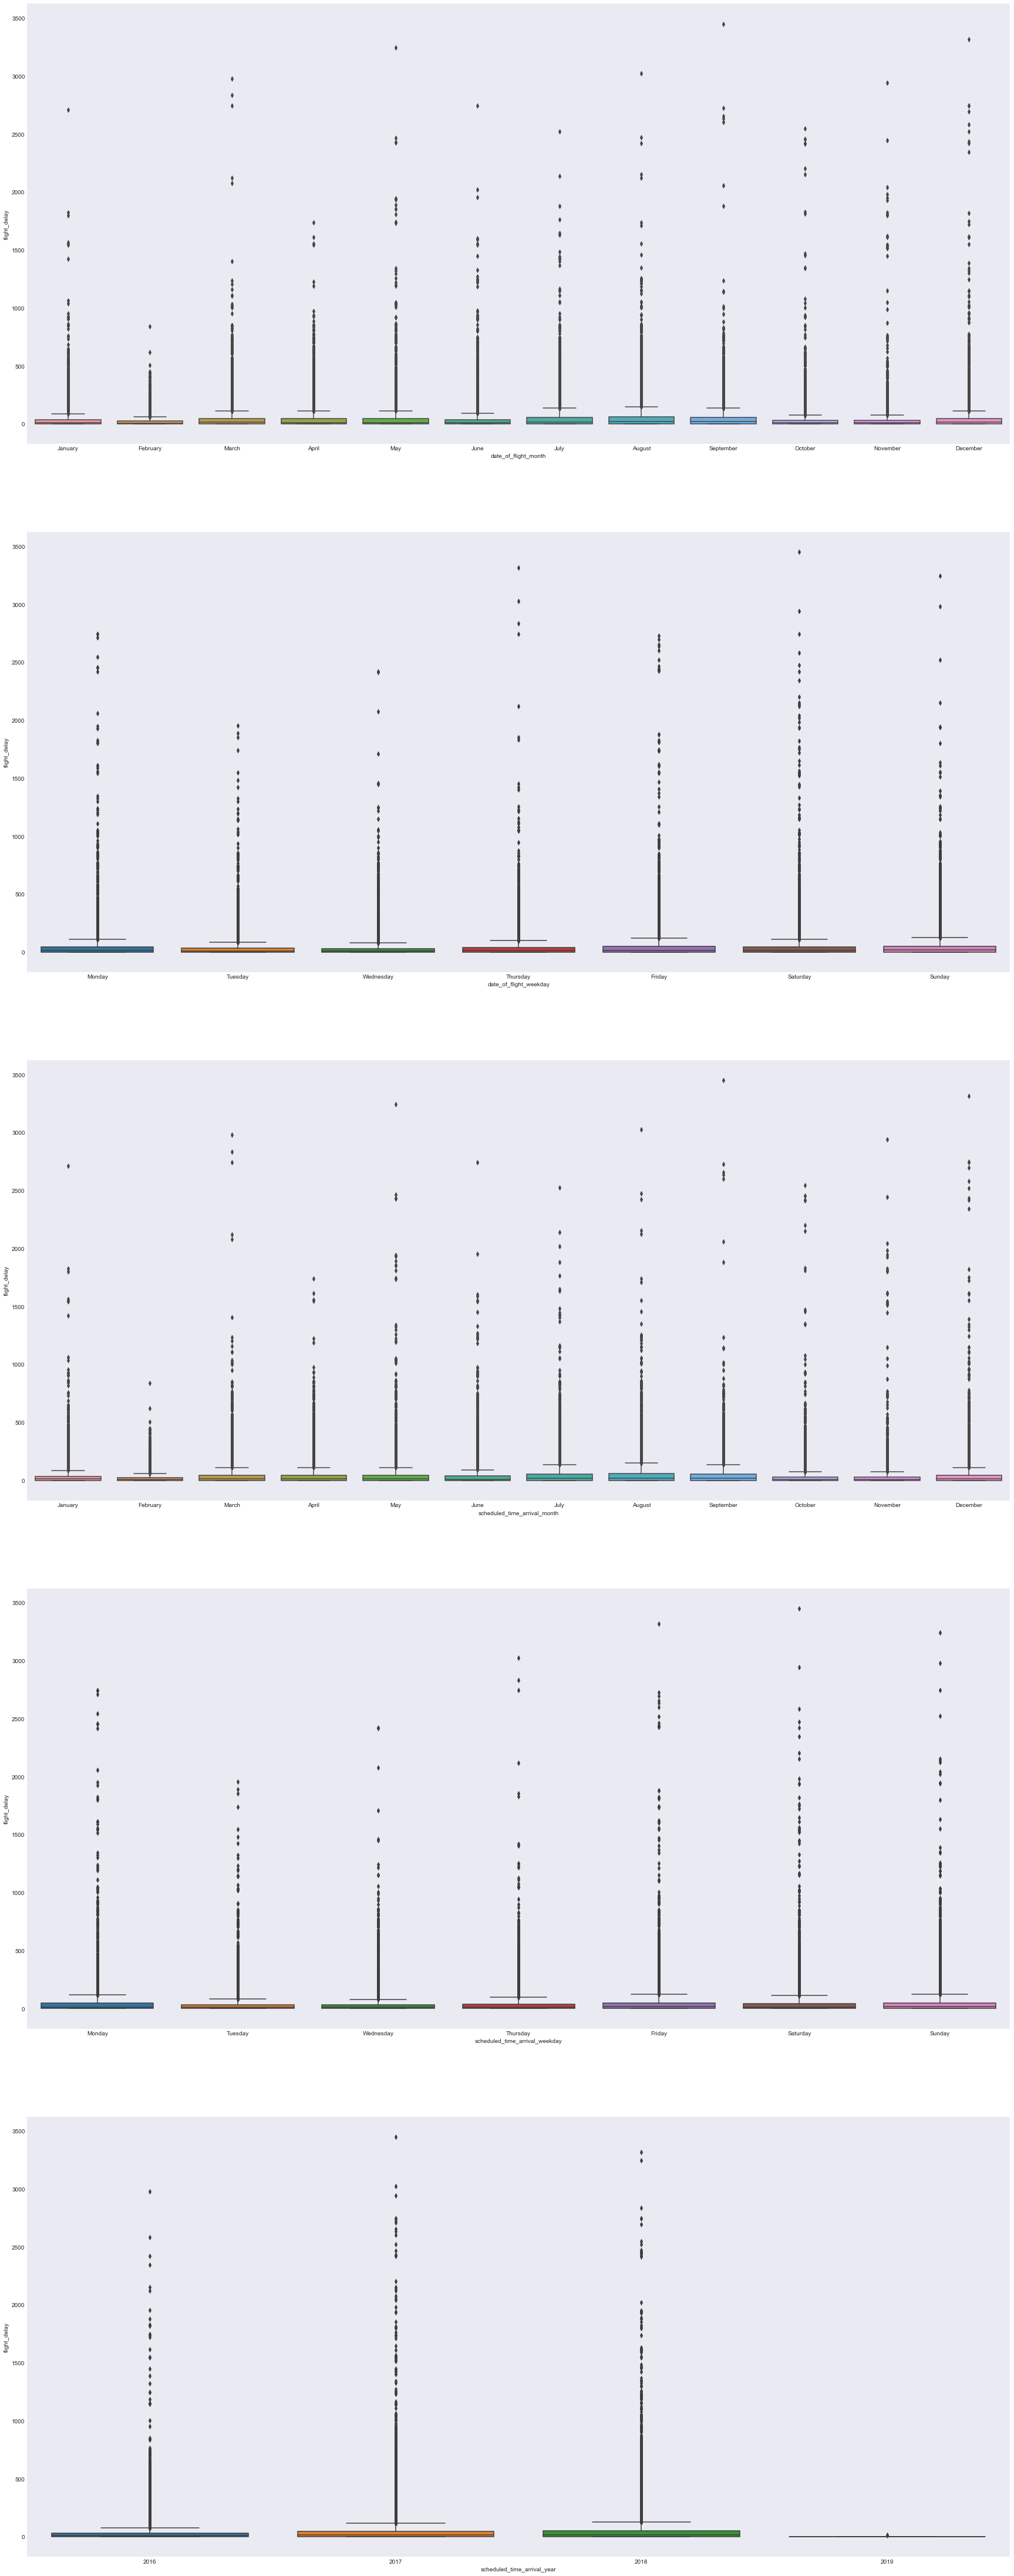

In [317]:
fig, ax = plt.subplots(nrows=5, figsize=(30,80))

sns.boxplot(data=train, x='date_of_flight_month', y='flight_delay', ax=ax[0])
sns.boxplot(data=train, x='date_of_flight_weekday', y='flight_delay', ax=ax[1])
sns.boxplot(data=train, x='scheduled_time_arrival_month', y='flight_delay', ax=ax[2])
sns.boxplot(data=train, x='scheduled_time_arrival_weekday', y='flight_delay', ax=ax[3])
sns.boxplot(data=train, x='scheduled_time_arrival_year', y='flight_delay', ax=ax[4])

In [318]:
train['scheduled_time_departure_hour'].value_counts().head(5)

10    9648
16    8433
7     8169
8     7460
13    7353
Name: scheduled_time_departure_hour, dtype: int64

In [321]:
train['arrival_time_binned'] = pd.cut(train['scheduled_time_arrival_hour'], bins=[0,8,16,24], labels=['early_day', 'mid_day', 'late_day'], include_lowest=True)
train['scheduled_time_binned'] = pd.cut(train['scheduled_time_departure_hour'], bins=[0,8,16,24], labels=['early_day', 'mid_day', 'late_day'], include_lowest=True)

In [322]:
test['arrival_time_binned'] = pd.cut(test['scheduled_time_arrival_hour'], bins=[0,8,16,24], labels=['early_day', 'mid_day', 'late_day'], include_lowest=True)
test['scheduled_time_binned'] = pd.cut(test['scheduled_time_departure_hour'], bins=[0,8,16,24], labels=['early_day', 'mid_day', 'late_day'], include_lowest=True)

<AxesSubplot:xlabel='arrival_time_binned', ylabel='flight_delay'>

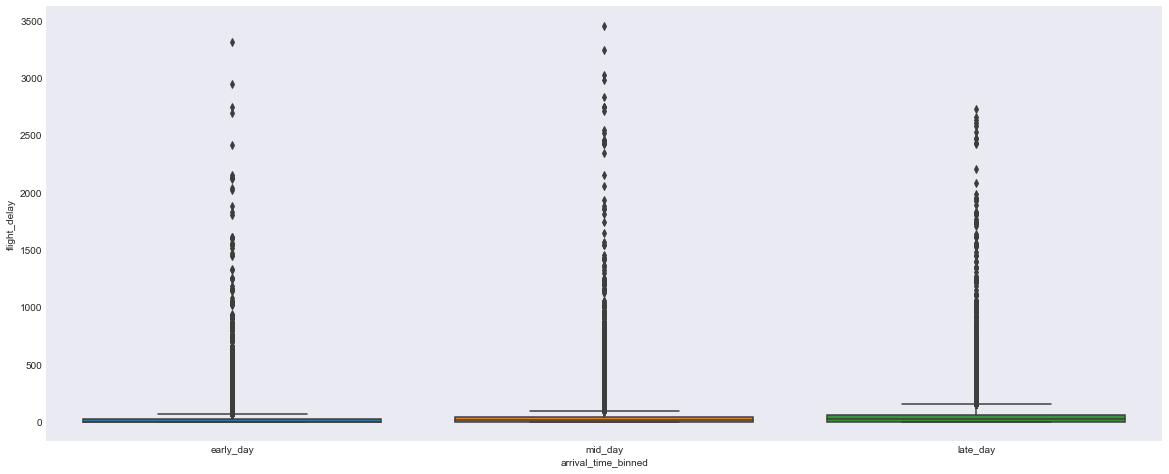

In [323]:
fig, ax = plt.subplots(figsize=(20,8))

sns.boxplot(data=train, x='arrival_time_binned', y='flight_delay')

In [327]:
cat_columns = ['flight_status', 'date_of_flight_year', 'date_of_flight_quarter', 'date_of_flight_weekday', 'scheduled_time_departure_year', 'scheduled_time_departure_month', 'scheduled_time_departure_weekday', 'scheduled_time_departure_quarter', 'scheduled_time_arrival_year', 'scheduled_time_arrival_month', 'scheduled_time_arrival_weekday', 'scheduled_time_arrival_quarter', 'flight_id', 'aircraft_id']

for col in cat_columns:
    train[col] = train[col].astype('category')
    test[col] = test[col].astype('category')

### Feature Selection

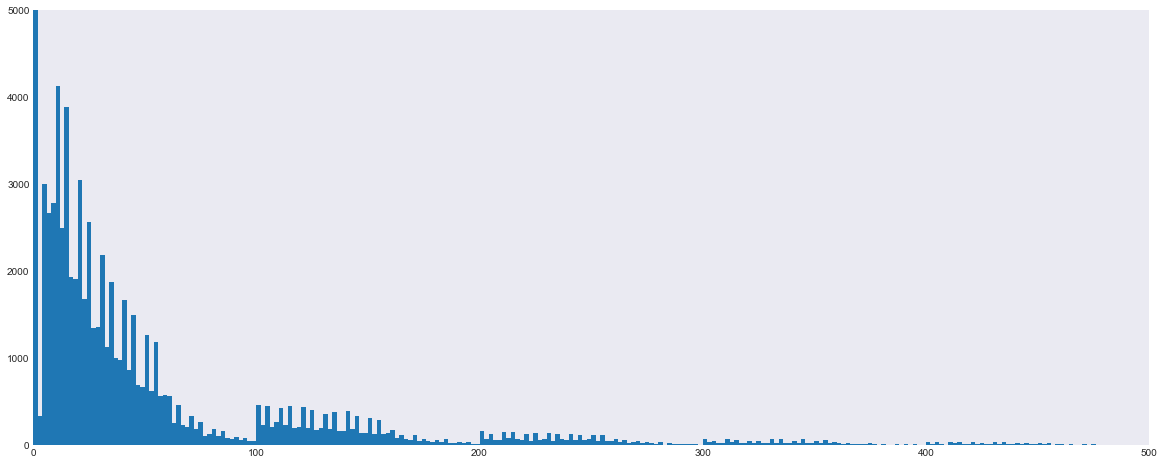

In [328]:
plt.figure(figsize=(20,8))
plt.hist(train['flight_delay'], bins=np.arange(0, 3452,2))
plt.ylim([0,5000])
plt.xlim([0,500])
plt.show()

In [329]:
train['estimated_flight_duration_minutes'].max() / 60 /24

499.6666666666667

The above is clearly an outlier

In [330]:
from scipy.stats import iqr

def remove_outlier(col):
    q_lower, q_upper = np.percentile(train[col], [25,75])
    max_val = q_upper + 1.5 * iqr(train[col])
    min_val = q_lower - 1.5 * iqr(train[col])
    train_cleaned = train[(train[col]>=min_val) & (train[col]<=max_val)]
    return train_cleaned

In [331]:
train_cleaned = remove_outlier('estimated_flight_duration_minutes')

In [332]:
train_cleaned.reset_index(inplace=True, drop=True)

In [333]:
train.groupby('flight_id')['flight_delay'].mean()

flight_id
12Y      0.000000
20M      0.000000
6YE      0.000000
A        0.000000
AOG      0.000000
AT      30.445080
AUI    341.000000
C        0.000000
D4       0.000000
DAT    203.000000
GJT     25.000000
INT      0.000000
PRO      0.000000
SGT      0.000000
TU      55.819781
UG       7.077592
UH       0.000000
WKL      0.000000
X9       0.000000
Name: flight_delay, dtype: float64

In [334]:
train.groupby('date_of_flight_year')['flight_delay'].mean()

date_of_flight_year
2016    33.067227
2017    53.702919
2018    58.318729
Name: flight_delay, dtype: float64

In [335]:
train.groupby('aircraft_id')['flight_delay'].mean().sort_values(ascending=False)

aircraft_id
OL    205.400000
GW    126.147059
5K    121.611940
UJ    118.350000
X9     91.076923
5M     90.730769
PS     87.758209
GJ     75.950266
D4     50.763533
TU     50.531818
BJ     50.206452
QS     39.781250
6P     19.166667
UG      1.047960
Name: flight_delay, dtype: float64

In [336]:
train.groupby('arrival_time_binned')['flight_delay'].mean().sort_values(ascending=False)

arrival_time_binned
late_day     65.171528
mid_day      43.219102
early_day    37.799127
Name: flight_delay, dtype: float64

In [337]:
train.groupby('scheduled_time_binned')['flight_delay'].mean().sort_values(ascending=False)

scheduled_time_binned
late_day     56.243369
mid_day      53.443023
early_day    34.662904
Name: flight_delay, dtype: float64

In [338]:
train.groupby('flight_status')['flight_delay'].mean().sort_values(ascending=False)

flight_status
RTR    69.894558
ATA    55.655099
DEP    44.462527
DEL     0.000000
SCH     0.000000
Name: flight_delay, dtype: float64

### Data Preprocessing

In [339]:
drop_cols = ['ID', 'date_of_flight', 'scheduled_time_departure', 'scheduled_time_arrival', 'date_of_flight_year', 'date_of_flight_month', 'date_of_flight_weekday', 'date_of_flight_quarter', 'date_of_flight_day']


train_proc = train_cleaned.drop(drop_cols, axis=1)
test_proc = test.drop(drop_cols, axis=1)

In [340]:
pd.set_option('display.max_columns', 30)
train_proc.head()

,flight_number,departure_point,arrival_point,flight_status,aircraft_code,flight_delay,scheduled_time_departure_year,scheduled_time_departure_month,scheduled_time_departure_weekday,scheduled_time_departure_quarter,scheduled_time_departure_day,scheduled_time_departure_hour,scheduled_time_arrival_year,scheduled_time_arrival_month,scheduled_time_arrival_weekday,scheduled_time_arrival_quarter,scheduled_time_arrival_day,scheduled_time_arrival_hour,estimated_flight_duration_minutes,aircraft_id,arrival_time_binned,scheduled_time_binned,flight_id
0,TU 0712,CMN,TUN,ATA,TU 32AIMN,260.0,2016,January,Sunday,1,3,10,2016,January,Sunday,1,3,12,145,TU,mid_day,mid_day,TU
1,TU 0757,MXP,TUN,ATA,TU 31BIMO,20.0,2016,January,Wednesday,1,13,15,2016,January,Wednesday,1,13,16,110,TU,mid_day,mid_day,TU
2,TU 0214,TUN,IST,ATA,TU 32AIMN,0.0,2016,January,Saturday,1,16,4,2016,January,Saturday,1,16,6,155,TU,early_day,early_day,TU
3,TU 0480,DJE,NTE,ATA,TU 736IOK,0.0,2016,January,Sunday,1,17,14,2016,January,Sunday,1,17,17,170,TU,late_day,mid_day,TU
4,TU 0338,TUN,ALG,ATA,TU 320IMU,22.0,2016,January,Sunday,1,17,14,2016,January,Sunday,1,17,15,80,TU,mid_day,mid_day,TU


In [341]:
### cyclical feature encoding

month_map = {
    'January': 0,
    'February': 1,
    'March': 2,
    'April': 3,
    'May': 4,
    'June': 5,
    'July': 6,
    'August': 7,
    'September': 8,
    'October': 9,
    'November': 10,
    'December': 11
}

week_map = {
    'Sunday': 0,
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
}

binned_time_map = { 
    'early_day': 0,
    'mid_day': 1,
    'late_day': 2
}

In [343]:
for col in ['scheduled_time_departure_quarter', 'scheduled_time_arrival_quarter']:
    train_proc[col] = train_proc[col].astype(np.int64)
    test_proc[col] = test_proc[col].astype(np.int64)

In [344]:
def change_cols(df):
    for col in ['scheduled_time_departure_month', 'scheduled_time_departure_weekday', 'scheduled_time_arrival_month', 'scheduled_time_arrival_weekday', 'arrival_time_binned', 'scheduled_time_binned']:
        if col in ['scheduled_time_departure_month', 'scheduled_time_arrival_month']:
            df[col] = df[col].apply(lambda x: month_map[x])
        elif col in ['scheduled_time_departure_weekday', 'scheduled_time_arrival_weekday']:
            df[col] = df[col].apply(lambda x: week_map[x])
        else:
            df[col] = df[col].apply(lambda x: binned_time_map[x])
        df[col] = df[col].astype(np.int64)

In [345]:
change_cols(train_proc)

In [346]:
change_cols(test_proc)

In [347]:
def cyclical_transform(col, df):
    df[f"sine_{col}"] = np.sin(2 * np.pi * df[col]/ max(df[col]))
    df[f"cos_{col}"] = np.cos(2 * np.pi * df[col]/ max(df[col]))
    df.drop(col, axis=1, inplace=True)

In [348]:
cyclical_features = ['scheduled_time_departure_month', 'scheduled_time_departure_weekday', 'scheduled_time_departure_quarter', 'scheduled_time_departure_day', 'scheduled_time_departure_hour', 'scheduled_time_arrival_month', 'scheduled_time_arrival_weekday', 'scheduled_time_arrival_quarter', 'scheduled_time_arrival_day', 'scheduled_time_arrival_hour', 'arrival_time_binned', 'scheduled_time_binned']

for col in cyclical_features:
    cyclical_transform(col, train_proc)
    cyclical_transform(col, test_proc)

In [349]:
cat_cols = train_proc.select_dtypes(include=['object','category']).columns
num_cols = list(train_proc.select_dtypes(include='number').columns)
num_cols.remove('flight_delay')

In [350]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [351]:
X = train_proc.drop('flight_delay', axis=1)
y = train_proc['flight_delay']

In [352]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [353]:
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [354]:
scl = StandardScaler()

In [355]:
def transform_df(df, train=True):
    df = pd.get_dummies(df, columns=cat_cols, drop_first=True)
    if train:
        scl_df = pd.DataFrame(scl.fit_transform(df[num_cols]), columns=num_cols)
    else:
        scl_df = pd.DataFrame(scl.transform(df[num_cols]), columns=num_cols)
    df.loc[:,num_cols] = scl_df
    return df

In [357]:
X_train_transformed = transform_df(X_train)
X_test_transformed = transform_df(X_test, train=False)
test_proc_transformed = transform_df(test_proc, train=False)

In [358]:
X_test_transformed = X_test_transformed.reindex(columns=X_train_transformed.columns, fill_value=0)

In [359]:
test_proc_transformed = test_proc_transformed.reindex(columns=X_train_transformed.columns, fill_value=0)

In [360]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [361]:
def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(y_test, y_pred))

In [362]:
rand_f = RandomForestRegressor()

In [213]:
rand_f.fit(X_train_transformed, y_train)

RandomForestRegressor()

In [363]:
def print_metrics(y_test, X_test, y_train, X_train, model):
    print(f"RMSE train: {rmse(y_train, model.predict(X_train))}")
    print(f"RMSE test: {rmse(y_test, model.predict(X_test))}")

In [365]:
# print_metrics(y_test, X_test_transformed, y_train, X_train_transformed, rand_f)

Overfitting seems to be a problem from the results above

In [221]:
orig_feat_imp = rand_f.feature_importances_

In [237]:
orig_feat_imp

array([3.32041204e-02, 1.85934634e-02, 1.19026306e-02, ...,
       5.81847783e-05, 8.28102150e-05, 2.09054102e-05])

In [263]:
masked_feat = [feat for feat, imp in list(zip(X_train_transformed.columns, orig_feat_imp)) if imp >= 0.005]
masked_imp = [imp for feat, imp in list(zip(X_train_transformed.columns, orig_feat_imp)) if imp >= 0.005]

In [265]:
len(masked_feat), sum(masked_imp)

(43, 0.6294172574860465)

In [372]:
X_train_transformed_ = X_train_transformed.loc[:, masked_feat]
X_test_transformed_ = X_test_transformed.loc[:, masked_feat]
test_proc_transformed = test_proc_transformed.loc[:, masked_feat]

### Neural Network

In [366]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# defining model

model = Sequential(
    [
        Dense(200, activation='relu'),
        Dense(50, activation='relu'),
        Dense(1, activation='linear')
    ]
)

# optimizer and loss

OPTIMIZER = tf.keras.optimizers.Adam(learning_rate=1e-3)
LOSS = tf.keras.losses.MeanSquaredError()

# compile
model.compile(optimizer=OPTIMIZER, loss=LOSS)

# fit
model.fit(np.asarray(X_train_transformed_).astype(np.float32), np.asarray(y_train).astype(np.float32), epochs=200)

# predicting the linear outputs
linear_outputs = model.predict(np.asarray(X_test_transformed_).astype(np.float32))

Epoch 1/200
2537/2537 [==============================] - 6s 2ms/step - loss: 12648.1602
Epoch 2/200
2537/2537 [==============================] - 5s 2ms/step - loss: 12395.8477
Epoch 3/200
2537/2537 [==============================] - 5s 2ms/step - loss: 12272.6748
Epoch 4/200
2537/2537 [==============================] - 5s 2ms/step - loss: 12174.9443
Epoch 5/200
2537/2537 [==============================] - 5s 2ms/step - loss: 12082.4893
Epoch 6/200
2537/2537 [==============================] - 5s 2ms/step - loss: 12026.6279
Epoch 7/200
2537/2537 [==============================] - 5s 2ms/step - loss: 11944.0039
Epoch 8/200
2537/2537 [==============================] - 5s 2ms/step - loss: 11875.3604
Epoch 9/200
2537/2537 [==============================] - 5s 2ms/step - loss: 11801.5967
Epoch 10/200
2537/2537 [==============================] - 5s 2ms/step - loss: 11743.1670
Epoch 11/200
2537/2537 [==============================] - 5s 2ms/step - loss: 11679.9561
Epoch 12/200
2537/2537 [======

2537/2537 [==============================] - 6s 2ms/step - loss: 8757.2080
Epoch 94/200
2537/2537 [==============================] - 6s 2ms/step - loss: 8740.5625
Epoch 95/200
2537/2537 [==============================] - 6s 2ms/step - loss: 8746.1191
Epoch 96/200
2537/2537 [==============================] - 6s 2ms/step - loss: 8729.6924
Epoch 97/200
2537/2537 [==============================] - 6s 2ms/step - loss: 8667.0449
Epoch 98/200
2537/2537 [==============================] - 6s 2ms/step - loss: 8694.9102
Epoch 99/200
2537/2537 [==============================] - 6s 2ms/step - loss: 8655.6729
Epoch 100/200
2537/2537 [==============================] - 6s 2ms/step - loss: 8653.4736
Epoch 101/200
2537/2537 [==============================] - 6s 2ms/step - loss: 8623.0840
Epoch 102/200
2537/2537 [==============================] - 6s 2ms/step - loss: 8607.0146
Epoch 103/200
2537/2537 [==============================] - 6s 2ms/step - loss: 8620.3721
Epoch 104/200
2537/2537 [================

2537/2537 [==============================] - 5s 2ms/step - loss: 7697.3457
Epoch 185/200
2537/2537 [==============================] - 5s 2ms/step - loss: 7697.1973
Epoch 186/200
2537/2537 [==============================] - 5s 2ms/step - loss: 7686.4790
Epoch 187/200
2537/2537 [==============================] - 5s 2ms/step - loss: 7690.1973
Epoch 188/200
2537/2537 [==============================] - 5s 2ms/step - loss: 7656.7549
Epoch 189/200
2537/2537 [==============================] - 5s 2ms/step - loss: 7645.4521
Epoch 190/200
2537/2537 [==============================] - 5s 2ms/step - loss: 7657.1577
Epoch 191/200
2537/2537 [==============================] - 5s 2ms/step - loss: 7640.6807
Epoch 192/200
2537/2537 [==============================] - 5s 2ms/step - loss: 7615.2769
Epoch 193/200
2537/2537 [==============================] - 5s 2ms/step - loss: 7642.5195
Epoch 194/200
2537/2537 [==============================] - 5s 2ms/step - loss: 7629.8804
Epoch 195/200
2537/2537 [==========

In [369]:
print(linear_outputs)

[[28.77846   ]
 [ 0.72615457]
 [92.39096   ]
 ...
 [ 9.998051  ]
 [87.45935   ]
 [22.739594  ]]


In [370]:
rmse(y_test, linear_outputs)

112.83369448678485

In [371]:
test_proc_transformed.shape

(9333, 2019)

In [375]:
preds = model.predict(test_proc_transformed)

292/292 [==============================] - 0s 2ms/step


In [377]:
preds

array([[ 23.694279  ],
       [132.30313   ],
       [ 94.682014  ],
       ...,
       [ -0.591213  ],
       [ -0.38541007],
       [ -0.45065665]], dtype=float32)

In [384]:
def change_sub_vals():
    sub = pd.read_csv('SampleSubmission.csv')
    sub['target'] = preds
    sub.rename({'ID':'id'})
    sub.to_csv('sub.csv', index=False)

In [385]:
change_sub_vals()

In [387]:
from catboost import CatBoostRegressor

In [388]:
cat = CatBoostRegressor()

In [389]:
cat.fit(X_train_transformed_, y_train)

Learning rate set to 0.082011
0:	learn: 115.3381606	total: 159ms	remaining: 2m 39s
1:	learn: 114.8868743	total: 174ms	remaining: 1m 26s
2:	learn: 114.4678432	total: 187ms	remaining: 1m 2s
3:	learn: 114.1206067	total: 200ms	remaining: 49.9s
4:	learn: 113.8503342	total: 213ms	remaining: 42.4s
5:	learn: 113.6231208	total: 225ms	remaining: 37.3s
6:	learn: 113.3993678	total: 238ms	remaining: 33.8s
7:	learn: 113.2157786	total: 248ms	remaining: 30.8s
8:	learn: 113.0492802	total: 259ms	remaining: 28.5s
9:	learn: 112.9904814	total: 266ms	remaining: 26.4s
10:	learn: 112.9353438	total: 274ms	remaining: 24.6s
11:	learn: 112.8845123	total: 280ms	remaining: 23.1s
12:	learn: 112.7301957	total: 287ms	remaining: 21.8s
13:	learn: 112.6844407	total: 293ms	remaining: 20.6s
14:	learn: 112.5413556	total: 299ms	remaining: 19.6s
15:	learn: 112.5001415	total: 305ms	remaining: 18.8s
16:	learn: 112.3669686	total: 312ms	remaining: 18s
17:	learn: 112.2399381	total: 318ms	remaining: 17.3s
18:	learn: 112.2028943	tot

165:	learn: 107.2896848	total: 1.44s	remaining: 7.23s
166:	learn: 107.2848154	total: 1.45s	remaining: 7.21s
167:	learn: 107.2589628	total: 1.45s	remaining: 7.2s
168:	learn: 107.2167125	total: 1.46s	remaining: 7.19s
169:	learn: 107.1912836	total: 1.47s	remaining: 7.18s
170:	learn: 107.1641845	total: 1.48s	remaining: 7.16s
171:	learn: 107.1413764	total: 1.48s	remaining: 7.14s
172:	learn: 107.1327790	total: 1.49s	remaining: 7.12s
173:	learn: 107.1138566	total: 1.5s	remaining: 7.1s
174:	learn: 107.1069839	total: 1.5s	remaining: 7.08s
175:	learn: 107.0925325	total: 1.51s	remaining: 7.06s
176:	learn: 107.0655156	total: 1.51s	remaining: 7.04s
177:	learn: 107.0563487	total: 1.52s	remaining: 7.02s
178:	learn: 106.9734361	total: 1.53s	remaining: 7.01s
179:	learn: 106.9525168	total: 1.53s	remaining: 6.99s
180:	learn: 106.9191944	total: 1.54s	remaining: 6.97s
181:	learn: 106.9135742	total: 1.55s	remaining: 6.95s
182:	learn: 106.8825005	total: 1.55s	remaining: 6.94s
183:	learn: 106.8771602	total: 1

330:	learn: 103.7003599	total: 2.71s	remaining: 5.47s
331:	learn: 103.6859879	total: 2.72s	remaining: 5.46s
332:	learn: 103.6698340	total: 2.73s	remaining: 5.46s
333:	learn: 103.6676752	total: 2.73s	remaining: 5.45s
334:	learn: 103.6442517	total: 2.74s	remaining: 5.44s
335:	learn: 103.6295791	total: 2.75s	remaining: 5.43s
336:	learn: 103.6001494	total: 2.76s	remaining: 5.42s
337:	learn: 103.5608174	total: 2.76s	remaining: 5.41s
338:	learn: 103.5491787	total: 2.77s	remaining: 5.4s
339:	learn: 103.5189551	total: 2.78s	remaining: 5.39s
340:	learn: 103.4944207	total: 2.78s	remaining: 5.38s
341:	learn: 103.4927447	total: 2.79s	remaining: 5.37s
342:	learn: 103.4708140	total: 2.8s	remaining: 5.36s
343:	learn: 103.4482605	total: 2.8s	remaining: 5.35s
344:	learn: 103.4317715	total: 2.81s	remaining: 5.34s
345:	learn: 103.4170717	total: 2.82s	remaining: 5.33s
346:	learn: 103.4042603	total: 2.82s	remaining: 5.31s
347:	learn: 103.3849744	total: 2.83s	remaining: 5.3s
348:	learn: 103.3642119	total: 2

486:	learn: 101.3453270	total: 3.83s	remaining: 4.04s
487:	learn: 101.3349670	total: 3.84s	remaining: 4.03s
488:	learn: 101.3209960	total: 3.85s	remaining: 4.02s
489:	learn: 101.3004099	total: 3.86s	remaining: 4.01s
490:	learn: 101.2936256	total: 3.86s	remaining: 4.01s
491:	learn: 101.2843889	total: 3.87s	remaining: 4s
492:	learn: 101.2697943	total: 3.88s	remaining: 3.99s
493:	learn: 101.2481365	total: 3.89s	remaining: 3.98s
494:	learn: 101.2358645	total: 3.9s	remaining: 3.98s
495:	learn: 101.2157791	total: 3.91s	remaining: 3.97s
496:	learn: 101.2052936	total: 3.91s	remaining: 3.96s
497:	learn: 101.1961470	total: 3.92s	remaining: 3.95s
498:	learn: 101.1733758	total: 3.93s	remaining: 3.95s
499:	learn: 101.1539494	total: 3.94s	remaining: 3.94s
500:	learn: 101.1360436	total: 3.95s	remaining: 3.93s
501:	learn: 101.1237953	total: 3.95s	remaining: 3.92s
502:	learn: 101.0999894	total: 3.96s	remaining: 3.91s
503:	learn: 101.0925458	total: 3.97s	remaining: 3.91s
504:	learn: 101.0765928	total: 3

651:	learn: 99.1356084	total: 5.13s	remaining: 2.74s
652:	learn: 99.1306641	total: 5.13s	remaining: 2.73s
653:	learn: 99.1231878	total: 5.14s	remaining: 2.72s
654:	learn: 99.1172510	total: 5.15s	remaining: 2.71s
655:	learn: 99.1036996	total: 5.15s	remaining: 2.7s
656:	learn: 99.0981092	total: 5.16s	remaining: 2.69s
657:	learn: 99.0900046	total: 5.17s	remaining: 2.69s
658:	learn: 99.0756319	total: 5.17s	remaining: 2.68s
659:	learn: 99.0618733	total: 5.18s	remaining: 2.67s
660:	learn: 99.0526236	total: 5.18s	remaining: 2.66s
661:	learn: 99.0425933	total: 5.19s	remaining: 2.65s
662:	learn: 99.0276528	total: 5.2s	remaining: 2.64s
663:	learn: 99.0174091	total: 5.2s	remaining: 2.63s
664:	learn: 99.0089028	total: 5.21s	remaining: 2.63s
665:	learn: 98.9972898	total: 5.22s	remaining: 2.62s
666:	learn: 98.9864605	total: 5.22s	remaining: 2.61s
667:	learn: 98.9708243	total: 5.23s	remaining: 2.6s
668:	learn: 98.9575212	total: 5.24s	remaining: 2.59s
669:	learn: 98.9480676	total: 5.24s	remaining: 2.5

813:	learn: 97.2505853	total: 6.43s	remaining: 1.47s
814:	learn: 97.2432856	total: 6.44s	remaining: 1.46s
815:	learn: 97.2358822	total: 6.45s	remaining: 1.45s
816:	learn: 97.2242879	total: 6.45s	remaining: 1.45s
817:	learn: 97.2220713	total: 6.46s	remaining: 1.44s
818:	learn: 97.2127818	total: 6.47s	remaining: 1.43s
819:	learn: 97.2035754	total: 6.48s	remaining: 1.42s
820:	learn: 97.1984436	total: 6.48s	remaining: 1.41s
821:	learn: 97.1893706	total: 6.49s	remaining: 1.41s
822:	learn: 97.1762808	total: 6.5s	remaining: 1.4s
823:	learn: 97.1615811	total: 6.51s	remaining: 1.39s
824:	learn: 97.1454294	total: 6.52s	remaining: 1.38s
825:	learn: 97.1351317	total: 6.53s	remaining: 1.37s
826:	learn: 97.1257217	total: 6.53s	remaining: 1.37s
827:	learn: 97.1234564	total: 6.54s	remaining: 1.36s
828:	learn: 97.1028524	total: 6.55s	remaining: 1.35s
829:	learn: 97.0838388	total: 6.56s	remaining: 1.34s
830:	learn: 97.0817368	total: 6.56s	remaining: 1.33s
831:	learn: 97.0753080	total: 6.57s	remaining: 1

994:	learn: 95.5017805	total: 7.71s	remaining: 38.8ms
995:	learn: 95.4938822	total: 7.72s	remaining: 31ms
996:	learn: 95.4901853	total: 7.73s	remaining: 23.3ms
997:	learn: 95.4806116	total: 7.74s	remaining: 15.5ms
998:	learn: 95.4706312	total: 7.74s	remaining: 7.75ms
999:	learn: 95.4607722	total: 7.75s	remaining: 0us


In [391]:
preds = cat.predict(test_proc_transformed)

In [392]:
change_sub_vals()